In [25]:
%matplotlib inline
from matplotlib import pylab

from pylab import rcParams
rcParams['figure.figsize'] = 10, 5


## the preparatory commands

```
# extract ~300 shewanella signatures across all ksizes
sourmash sig grep Shewanella /group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-rs207.genomic.k?1.zip -o shewanella.zip

# pull out a query
sourmash sig grep OS185 shewanella.zip -o query-os185.zip

# run prefetch at each ksize
sourmash prefetch -k 21 query-os185.zip shewanella.zip --threshold-bp=0 -o os185.k21.csv
sourmash prefetch -k 31 query-os185.zip shewanella.zip --threshold-bp=0 -o os185.k31.csv
sourmash prefetch -k 51 query-os185.zip shewanella.zip --threshold-bp=0 -o os185.k51.csv
```

In [26]:
ls

gtdb-rs207.genomic-reps.dna.k31.zip  os185.31.csv  os185.51.csv
multiksize.ipynb		     os185.33.csv  os185.k21.csv
os185.15.csv			     os185.35.csv  os185.k31.csv
os185.17.csv			     os185.37.csv  os185.k51.csv
os185.19.csv			     os185.39.csv  query-os185.zip
os185.21.csv			     os185.41.csv  shewanella-many-k-2.zip
os185.23.csv			     os185.43.csv  shewanella-many-k.zip
os185.25.csv			     os185.45.csv  shewanella.zip
os185.27.csv			     os185.47.csv
os185.29.csv			     os185.49.csv


In [28]:
import pandas

k_dfs = {}
for k in range(15, 53, 2):
    k_dfs[k] = pandas.read_csv(f'os185.{k}.csv')

#k21 = pandas.read_csv('os185.k21.csv')
#k31 = pandas.read_csv('os185.k31.csv')
#k51 = pandas.read_csv('os185.k51.csv')

In [29]:
k_sub = {}
for k in k_dfs:
    df = k_dfs[k][["query_name", "match_name", "intersect_bp", "query_containment_ani"]]
    df.columns = ['qname', 'mname', f'k{k}_bp', f'k{k}_ani']
    k_sub[k] = df

df = k_sub[15]
for k in k_sub:
    if k == 15:
        continue
    df = df.merge(k_sub[k], on=["qname", "mname"], how="inner")

#k21_sub = k21[["query_name", "match_name", "intersect_bp", "query_containment_ani"]]
#k31_sub = k31[["query_name", "match_name", "intersect_bp", "query_containment_ani"]]
#k51_sub = k51[["query_name", "match_name", "intersect_bp", "query_containment_ani"]]

#k21_sub.columns = ['qname', 'mname', 'k21_bp', 'k21_ani']
#k31_sub.columns = ['qname', 'mname', 'k31_bp', 'k31_ani']
#k51_sub.columns = ['qname', 'mname', 'k51_bp', 'k51_ani']

#print(len(k21_sub), len(k31_sub))

#k_sub = k21_sub.merge(k31_sub, on=["qname", "mname"], how="inner")
#k_sub = k_sub.merge(k51_sub, on=["qname", "mname"], how="inner")

In [30]:
df.head()

,qname,mname,k15_bp,k15_ani,k17_bp,k17_ani,k19_bp,k19_ani,k21_bp,k21_ani,...,k43_bp,k43_ani,k45_bp,k45_ani,k47_bp,k47_ani,k49_bp,k49_ani,k51_bp,k51_ani
0,GCA_000017325.1 Shewanella baltica OS185,GCA_000013765.1 Shewanella denitrificans OS217,168000,0.798275,66000,0.774515,38000,0.772549,32000,0.783971,...,13000,0.869893,10000,0.870284,6000,0.866102,8000,0.876201,6000,0.876073
1,GCA_000017325.1 Shewanella baltica OS185,GCA_000014685.1 Shewanella sp. MR-4,370000,0.841418,258000,0.839185,181000,0.838697,185000,0.852289,...,41000,0.893442,38000,0.896489,33000,0.898094,33000,0.901911,35000,0.906898
2,GCA_000017325.1 Shewanella baltica OS185,GCA_000014705.1 Shewanella frigidimarina NCIMB...,190000,0.804851,68000,0.775877,30000,0.762997,33000,0.785121,...,11000,0.866520,7000,0.863413,5000,0.862749,9000,0.878310,9000,0.883066
3,GCA_000017325.1 Shewanella baltica OS185,GCA_000014885.1 Shewanella piezotolerans WP3,157000,0.794679,40000,0.752033,25000,0.755711,24000,0.773305,...,4000,0.846372,5000,0.856982,3000,0.853423,2000,0.851759,1000,0.845829
4,GCA_000017325.1 Shewanella baltica OS185,GCA_000015185.1 Shewanella sp. W3-18-1,612000,0.870125,484000,0.870823,379000,0.871962,372000,0.881116,...,108000,0.913795,96000,0.915144,99000,0.919334,73000,0.916643,77000,0.921027


Text(0.5, 0, 'k-mer size')

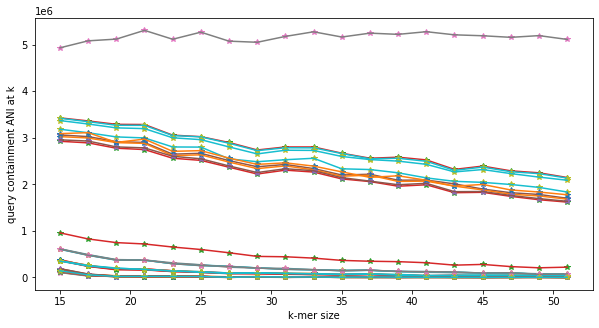

In [36]:
for n, row in df.iterrows():
    if n > 50: break
    x = []
    y = []
    for ksize in range(15, 53, 2):
        x.append(ksize)
        y.append(row[f'k{ksize}_bp'])
        
    pylab.plot(x, y, '*')
    pylab.plot(x, y, '-')

pylab.ylabel('query containment ANI at k')
pylab.xlabel('k-mer size')
#pylab.axis(ymax=1e6)